# Time- and zonal- mean layer thicknesses and meridional volume transport

This notebook is converted from plt_h_rho_vh_rho.py, which visualizes the time- and zonal-mean layer thicknesses (h_rho) and meridional volume transport (vh_rho) in pure potential density coordinates.

The approach used in v33 only keeps zstar as the vertical diagnostic coordinate. The diagnostic variables are h_rho and vh_rho in pure potential density coordinates (conversion done in MOM6).

In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt

In [2]:
data = nc.Dataset('/short/v45/lxy581/mom6/archive/so_mom6_v33/output028/prog_rho.nc','r')

In [3]:
xq = data.variables['xq'][:]        # uh_rho
yh = data.variables['yh'][:]        # uh_rho,h_rho
xh = data.variables['xh'][:]        # vh_rho,h_rho
yq = data.variables['yq'][:]        # vh_rho
zl = data.variables['zl'][:]

In [4]:
h_rho4  = data.variables['h_rho'][:,:,:,:]
vh_rho4 = data.variables['vh_rho'][:,:,:,:]
vh_rho4 = vh_rho4.filled(np.nan)

In [5]:
# time-mean
h_rho3  = np.nanmean(h_rho4,axis=0)
vh_rho3 = np.nanmean(vh_rho4,axis=0)

/apps/python/2.7.6/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:607: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [6]:
# zonal-sum for transport, zonal-mean for layer thicknesses
h_rho2  = np.nanmean(h_rho3,axis=-1)
vh_rho2 = np.nansum(vh_rho3,axis=-1)

/apps/python/2.7.6/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:514: FutureWarning: In Numpy 1.9 the sum along empty slices will be zero.
  FutureWarning)


In [7]:
h_rho2[h_rho2<2.5]=np.nan
vh_rho2[np.isnan(h_rho2)==True]=np.nan

Summing up layer thicknesses, h_sum is an array of total layer thicknesses along y-axis.

In [8]:
%matplotlib inline

(array([   0, 1000, 2000, 3000, 4000]), <a list of 5 Text yticklabel objects>)

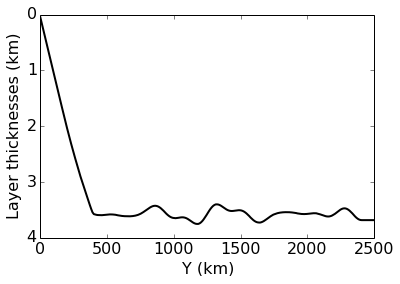

In [9]:
h_sum   = np.nansum(h_rho2,axis=0)
# print h_sum
plt.plot(yh,h_sum,linewidth=2.0,color='k')
plt.gca().set_xlim([-1250.0,1250.0])
plt.gca().set_xticks(np.arange(-1250,1250 + 500,500))
plt.gca().set_xticklabels(['0','500','1000','1500','2000','2500'])
plt.gca().set_ylim([0,4000.0])
plt.gca().set_yticks(np.arange(0,4000 + 1000,1000))
plt.gca().set_yticklabels(['0','1','2','3','4'])
plt.gca().invert_yaxis()
plt.xlabel('Y (km)',fontsize=16)
plt.ylabel('Layer thicknesses (km)',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

Plot layer thicknesses:

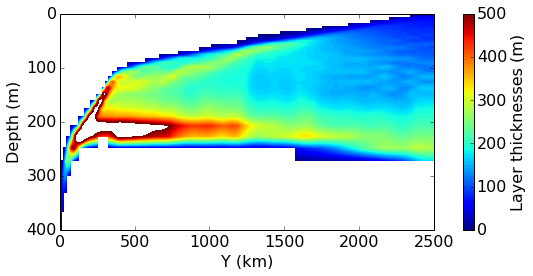

In [10]:
plt.figure(1,figsize=(8,5))

h_level = np.arange(0,500+5,5)
h_ticks = np.arange(0,500+100,100)

pc = plt.contourf(yh,zl,h_rho2,cmap=plt.cm.jet,levels=h_level)
cb = plt.colorbar(pc,ticks=h_ticks)
plt.gca().set_xticks(np.arange(-1250,1250 + 500,500))
plt.gca().set_xticklabels(['0','500','1000','1500','2000','2500'])
plt.gca().set_ylim([0,400.0])
plt.gca().set_yticks(np.arange(0,400 + 100,100))
plt.gca().set_yticklabels(['0','100','200','300','400'])
plt.gca().invert_yaxis()
plt.gca().set_position([0.15,0.2,0.65,0.6])
cb.ax.set_position([0.85,0.2,0.03,0.6])
cb.set_label('Layer thicknesses (m)',y=0.5,fontsize=16)
cb.ax.tick_params(labelsize=16)
plt.xlabel('Y (km)',fontsize=16)
plt.ylabel('Depth (m)',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#plt.savefig('/short/v45/lxy581/mom6/diag/v33_h_rho_y50.png',dpi=600)

plt.show()

Plot volume transport:

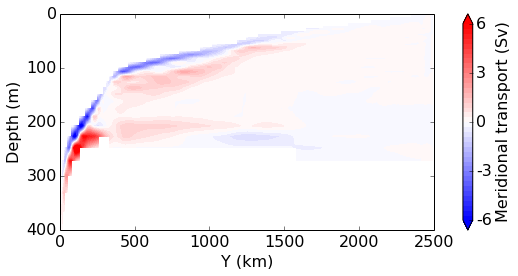

In [11]:
plt.figure(2,figsize=(8,5))

vh_level = np.arange(-6.0e+6,6.0e+6+0.3e+6,0.3e+6)
vh_ticks = np.arange(-6.0e+6,6.0e+6+3e+6,3e+6)

pc = plt.contourf(yq,zl,vh_rho2,cmap=plt.cm.bwr,levels=vh_level,extend='both')
cb = plt.colorbar(pc,ticks=vh_ticks)
plt.gca().set_xticks(np.arange(-1250,1250 + 500,500))
plt.gca().set_xticklabels(['0','500','1000','1500','2000','2500'])
plt.gca().set_ylim([0,400.0])
plt.gca().set_yticks(np.arange(0,400 + 100,100))
plt.gca().set_yticklabels(['0','100','200','300','400'])
plt.gca().invert_yaxis()
plt.gca().set_position([0.15,0.2,0.65,0.6])
cb.ax.set_position([0.85,0.2,0.03,0.6])
cb.ax.set_yticklabels(['-6','-3','0','3','6'])
cb.set_label('Meridional transport (Sv)',y=0.5,fontsize=16)
cb.ax.tick_params(labelsize=16)
plt.xlabel('Y (km)',fontsize=16)
plt.ylabel('Depth (m)',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#plt.savefig('/short/v45/lxy581/mom6/diag/v33_vh_rho_y50.png',dpi=600)

plt.show()

As you may notice, the vertical levels do not really make sense. It did not span the whole depth range. I do not know the real density levels corresponding to those depth levels.